Most specific recurring times (cluster centers): ['16:10:10', '02:37:30', '20:47:16']


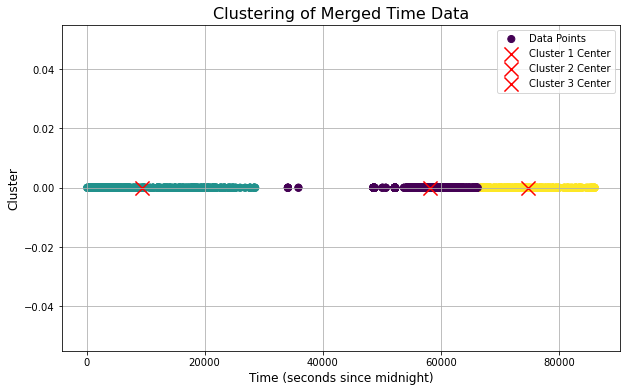

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load and merge the data
data1 = pd.read_csv("C:/Users/Archit Garg/Downloads/100_8_4__all.csv")
data2 = pd.read_csv("C:/Users/Archit Garg/Downloads/100_6_1__all.csv")
data3 = pd.read_csv("C:/Users/Archit Garg/Downloads/100_768_10__all.csv")

merged_data = pd.concat([data1, data2, data3], ignore_index=True)

def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

merged_data['time_seconds'] = merged_data['time'].apply(time_to_seconds)

# Prepare data for clustering
time_data = merged_data['time_seconds'].values.reshape(-1, 1)

# Perform clustering (3 clusters as an example)
kmeans = KMeans(n_clusters=3, random_state=42)
merged_data['cluster'] = kmeans.fit_predict(time_data)

# Get cluster centers in seconds
cluster_centers = kmeans.cluster_centers_

# Convert cluster centers to HH:MM:SS format
def seconds_to_time(seconds):
    h = int(seconds // 3600)
    m = int((seconds % 3600) // 60)
    s = int(seconds % 60)
    return f"{h:02}:{m:02}:{s:02}"

cluster_centers_times = [seconds_to_time(center[0]) for center in cluster_centers]

# Print cluster centers
print("Most specific recurring times (cluster centers):", cluster_centers_times)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['time_seconds'], [0] * len(merged_data), c=merged_data['cluster'], cmap='viridis', s=50, label='Data Points')

for i, center in enumerate(cluster_centers):
    plt.scatter(center[0], 0, color='red', marker='x', s=200, label=f'Cluster {i + 1} Center')

plt.title("Clustering of Merged Time Data", fontsize=16)
plt.xlabel("Time (seconds since midnight)", fontsize=12)
plt.ylabel("Cluster", fontsize=12)
plt.legend()
plt.grid()
plt.show()


In [5]:
merged_data.

,metric_id,timestamp,date,time,time_seconds,cluster
0,100_8_4,2024-09-24 13:30:03+00:00,24/09/24,13:30:03,48603,0
1,100_8_4,2024-09-24 13:31:03+00:00,24/09/24,13:31:03,48663,0
2,100_8_4,2024-09-25 02:01:46+00:00,25/09/24,2:01:46,7306,1
3,100_8_4,2024-09-25 03:24:17+00:00,25/09/24,3:24:17,12257,1
4,100_8_4,2024-09-25 05:00:02+00:00,25/09/24,5:00:02,18002,1
...,...,...,...,...,...,...
5213,100_768_10,2024-11-22 17:21:55+00:00,22/11/24,17:21:55,62515,0
5214,100_768_10,2024-11-22 17:22:50+00:00,22/11/24,17:22:50,62570,0
5215,100_768_10,2024-11-22 17:23:21+00:00,22/11/24,17:23:21,62601,0
5216,100_768_10,2024-11-22 18:06:26+00:00,22/11/24,18:06:26,65186,0
